In [1]:
import os
os.chdir("..")  # Moves one directory up

In [2]:
import importlib
importlib.import_module("models")

<module 'models' from 'c:\\Users\\user\\Documents\\Ariel\\pycharm_projects\\Drug_Response_Analysis\\src\\models\\__init__.py'>

In [3]:
import pandas as pd 
import numpy as np 
from utils.config import base_path
from preprocessing.preprocess import concat_metadata_with_gene_expression,prepare_dataset_for_feature_selection,normalize_features
from preprocessing.feature_selection import getting_best_features
from sklearn.model_selection import train_test_split
from models.model_traning import train_xgboost_classifier
from models.model_evaluation import ModelEvaluator

In [4]:
gene_expression = pd.read_csv(base_path/ "gene_expression.csv")
meta_data = pd.read_csv(base_path/ "meta_data.csv")

df = concat_metadata_with_gene_expression(meta_data,gene_expression,filter_nan_target=True)
df.head()

,SampleID,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,Tissue,disease state,protocol,disease activity score (das28),Response status,Gender
0,GSM381194,2.377898,7.109049,9.630326,2.331110,2.326892,7.145603,3.134364,2.374527,9.394731,...,2.389734,2.391520,2.372542,2.383567,whole blood,rheumatoid arthritis,anti_TNF therapy,4.51,Responder,Male
1,GSM381195,2.378662,5.156438,8.871972,2.337406,2.325880,6.724430,3.132534,2.371931,8.343010,...,2.389150,2.388430,2.371702,2.383306,whole blood,rheumatoid arthritis,anti_TNF therapy,6.04,Non_responder,Female
2,GSM381196,2.382631,5.321988,8.348816,2.334704,2.326533,6.856559,2.996339,2.373904,8.742820,...,2.389496,2.390634,2.373524,2.384077,whole blood,rheumatoid arthritis,anti_TNF therapy,5.92,Non_responder,Male
4,GSM381198,2.461926,5.980662,8.807910,2.334267,2.327032,7.758407,3.444969,2.375944,9.125310,...,2.389583,2.392193,2.373700,2.384135,whole blood,rheumatoid arthritis,anti_TNF therapy,6.00,Non_responder,Female
5,GSM381199,3.290609,6.352822,9.133817,2.337572,2.328993,7.381657,3.148597,2.399196,9.176213,...,2.397028,2.400408,2.378989,2.390307,whole blood,rheumatoid arthritis,anti_TNF therapy,5.20,Responder,Female


In [5]:
print(df["Response status"].unique())

['Responder' 'Non_responder']


In [6]:
X,y = prepare_dataset_for_feature_selection(df)
# X

In [ ]:
# Split into 80% Train, 15%
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.5, random_state=42, stratify=y
)
# 2️⃣ Feature Selection
print("🧬 Selecting top features...")
selected_features= list(getting_best_features(X_train,y_train))

In [8]:
selected_features

['236203_at',
 '1559434_at',
 '225840_at',
 '216883_x_at',
 '238141_s_at',
 '241400_at',
 '225437_s_at',
 '208613_s_at',
 '232477_at',
 '214318_s_at']

In [9]:
selected_features = selected_features + ["disease activity score (das28)", "Gender"]
selected_features

['236203_at',
 '1559434_at',
 '225840_at',
 '216883_x_at',
 '238141_s_at',
 '241400_at',
 '225437_s_at',
 '208613_s_at',
 '232477_at',
 '214318_s_at',
 'disease activity score (das28)',
 'Gender']

In [10]:
X_train,X_val= X_train[selected_features],X_val[selected_features]

In [11]:
X_train_scaled = normalize_features(X_train)
X_val_scaled = normalize_features(X_val)

In [ ]:
evaluator = ModelEvaluator(
X_train_scaled=X_train_scaled,
X_val_scaled=X_val_scaled,
y_train=y_train,
y_val=y_val
)

In [15]:
evaluator.generate_classification_report()

Classification Report - Training Data:
                precision    recall  f1-score   support

Non-Responder       1.00      1.00      1.00        17
    Responder       1.00      1.00      1.00        19

     accuracy                           1.00        36
    macro avg       1.00      1.00      1.00        36
 weighted avg       1.00      1.00      1.00        36


Classification Report - Validation Data:
                precision    recall  f1-score   support

Non-Responder       0.60      0.75      0.67         4
    Responder       0.67      0.50      0.57         4

     accuracy                           0.62         8
    macro avg       0.63      0.62      0.62         8
 weighted avg       0.63      0.62      0.62         8



#we can clearly see an overfit in the model, which means changing the model could be helpful/ keeping more features

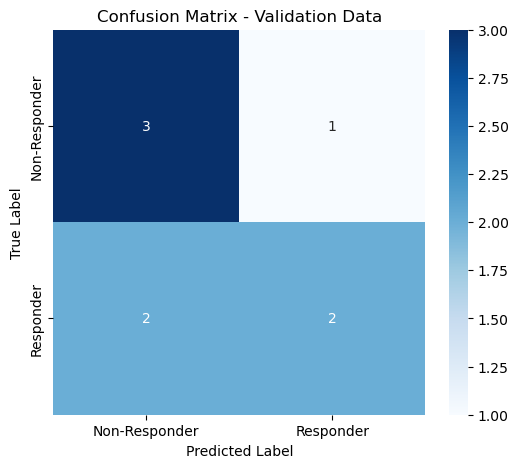

In [16]:
evaluator.plot_confusion_matrix()


c:\Users\user\Documents\Ariel\pycharm_projects\Drug_Response_Analysis\src\models\model_evaluation.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"][:top_n],


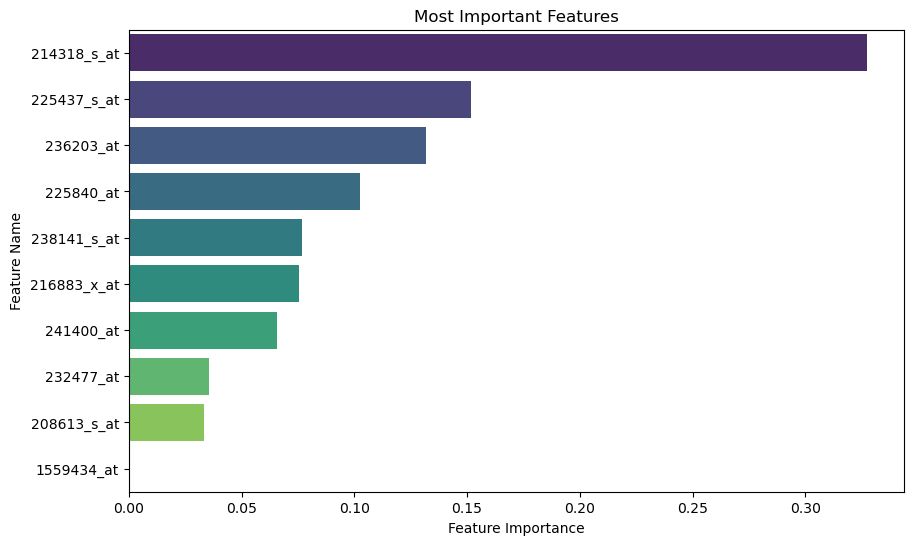

In [17]:
evaluator.plot_feature_importances(top_n=10)

Instance #5
Actual label: 1
Predicted label: 0, Probability: 0.0514


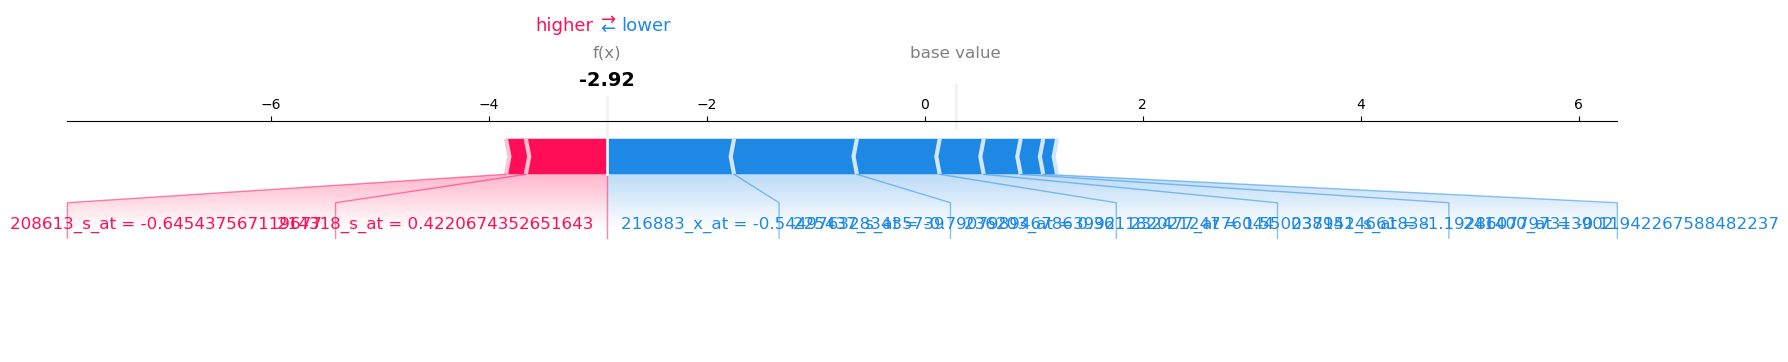

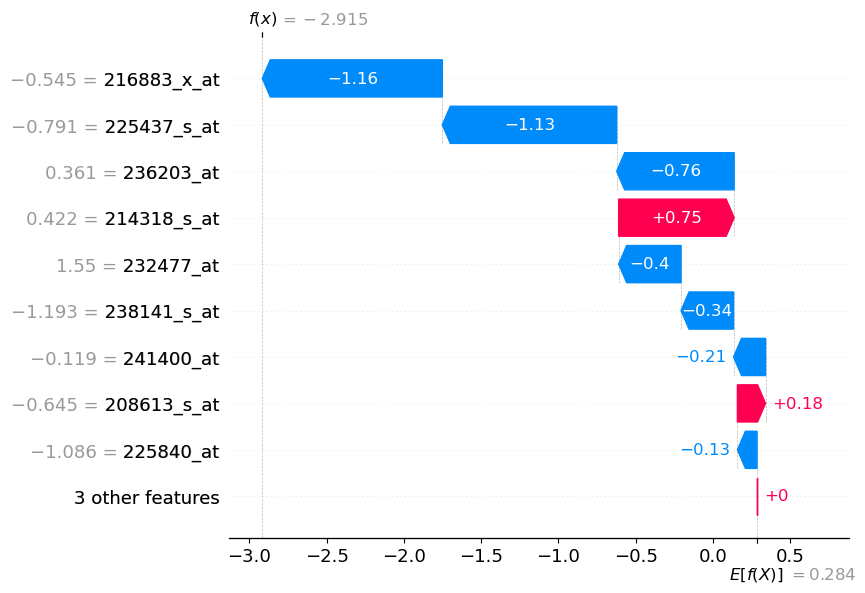

In [18]:
# Analyze a specific instance
evaluator.analyze_instance_with_shap(5)  # Analyze the 6th instance
